In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF , WhiteKernel


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,111)

In [5]:
virtual_samples

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

## define a callable Kriging model and sampling function

In [6]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_obs = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_obs.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_obs))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_obs)


# fixed noise level


In [12]:
# instantiate Bgolearn
Bgolearn = BGOS.Bgolearn()
method_name = 'EQI'

obs = 5
tolerance = 0.05

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.423457638847609
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.5]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.466369673300075
2 -th sampling, result =  3.756042429825239
3 -th sampling, result =  3.593902295943501
4 -th sampling, result =  4.07038668047828
5 -th sampling, result =  4.120237072602369
evaluated mean of added datum: [3.80138763]
evaluated std of added datum: 0.25743691986382855
---------------------------------------

1-th iteration 
 new added datum: (8.5, array([3.80138763]))


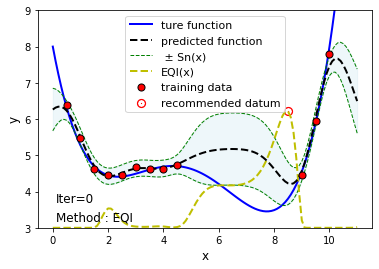

current optimal is : 3.864882889045722
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.3093935897315037
2 -th sampling, result =  3.5631223239436554
3 -th sampling, result =  3.3153859315761056
4 -th sampling, result =  2.670398620784877
5 -th sampling, result =  3.950055283847641
evaluated mean of added datum: [3.36167115]
evaluated std of added datum: 0.417015932272752
---------------------------------------

2-th iteration 
 new added datum: (8.1, array([3.36167115]))


<Figure size 432x288 with 0 Axes>

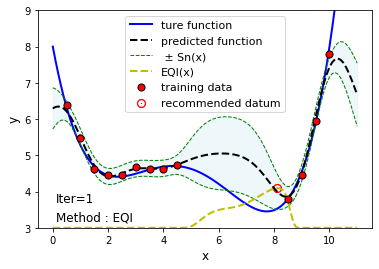

current optimal is : 3.5142767978354286
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.266641651329943
2 -th sampling, result =  3.547122426977832
3 -th sampling, result =  3.383642689205053
4 -th sampling, result =  3.6628742624015533
5 -th sampling, result =  2.7527876837173797
evaluated mean of added datum: [3.32261374]
evaluated std of added datum: 0.3155124452072386
---------------------------------------

3-th iteration 
 new added datum: (7.5, array([3.32261374]))


<Figure size 432x288 with 0 Axes>

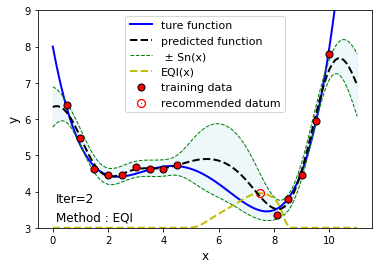

last response =  3.361671149976756
added datum y =  [3.32261374] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [13]:
guessed_noise_std = 0.3


data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(tao_new =guessed_noise_std)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.473667528516747
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.772265823153143
2 -th sampling, result =  2.846152835362931
3 -th sampling, result =  4.019071574017117
4 -th sampling, result =  3.4781462656377227
5 -th sampling, result =  4.11328493239145
evaluated mean of added datum: [3.64578429]
evaluated std of added datum: 0.4563794026314392
---------------------------------------

1-th iteration 
 new added datum: (8.4, array([3.64578429]))


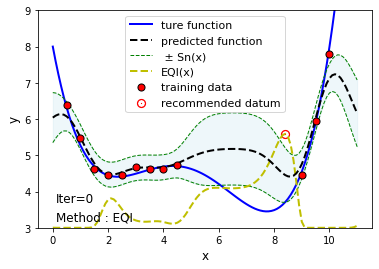

current optimal is : 3.864023200411131
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.472005582874896
2 -th sampling, result =  4.622609859350464
3 -th sampling, result =  4.225806491754437
4 -th sampling, result =  3.699399839367975
5 -th sampling, result =  3.092051945040377
evaluated mean of added datum: [3.82237474]
evaluated std of added datum: 0.5430259997188261
---------------------------------------

2-th iteration 
 new added datum: (8.1, array([3.82237474]))


<Figure size 432x288 with 0 Axes>

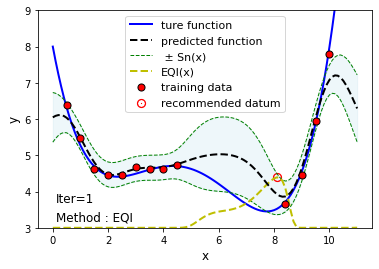

last response =  3.6457842861124723
added datum y =  [3.82237474] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [17]:
guessed_noise_std = 0.5


data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(tao_new =guessed_noise_std)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.547688416227402
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.3]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.269264173895698
2 -th sampling, result =  2.7890027549999123
3 -th sampling, result =  2.5110144413908024
4 -th sampling, result =  3.137188487165364
5 -th sampling, result =  4.479521848197628
evaluated mean of added datum: [3.43719834]
evaluated std of added datum: 0.7933160643693472
---------------------------------------

1-th iteration 
 new added datum: (8.3, array([3.43719834]))


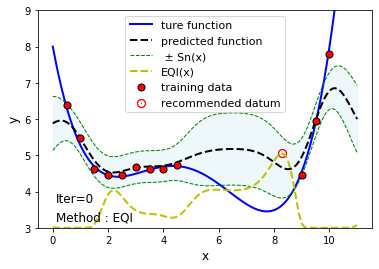

current optimal is : 3.9075456729309024
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.991032458010973
2 -th sampling, result =  3.602784344560563
3 -th sampling, result =  3.97991451960375
4 -th sampling, result =  5.089304554894505
5 -th sampling, result =  4.214165206068805
evaluated mean of added datum: [3.97544022]
evaluated std of added datum: 0.6936331073765513
---------------------------------------

2-th iteration 
 new added datum: (8.0, array([3.97544022]))


<Figure size 432x288 with 0 Axes>

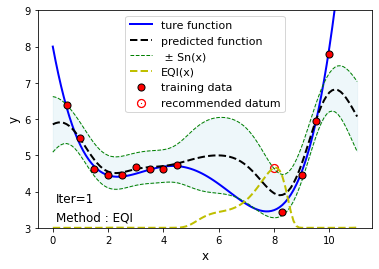

current optimal is : 3.9085720956196983
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.1660444448834246
2 -th sampling, result =  3.308950948707439
3 -th sampling, result =  2.5847692567885265
4 -th sampling, result =  3.104348395299098
5 -th sampling, result =  3.5293740499250728
evaluated mean of added datum: [3.13869742]
evaluated std of added datum: 0.3131704387306253
---------------------------------------

3-th iteration 
 new added datum: (8.200000000000001, array([3.13869742]))


<Figure size 432x288 with 0 Axes>

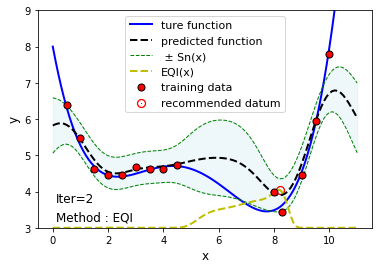

current optimal is : 3.680061102370148
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.6727362000417427
2 -th sampling, result =  3.3188946334518405
3 -th sampling, result =  3.8394092393921877
4 -th sampling, result =  3.145950790125443
5 -th sampling, result =  4.226063236513979
evaluated mean of added datum: [3.44061082]
evaluated std of added datum: 0.54170960360084
---------------------------------------

4-th iteration 
 new added datum: (8.1, array([3.44061082]))


<Figure size 432x288 with 0 Axes>

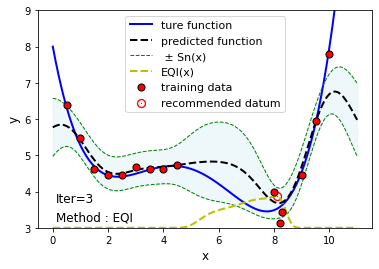

current optimal is : 3.618222300127183
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.3]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.6935049931601727
2 -th sampling, result =  3.0197614772257433
3 -th sampling, result =  4.601250337246913
4 -th sampling, result =  3.9413562486056937
5 -th sampling, result =  2.8435355308726002
evaluated mean of added datum: [3.61988172]
evaluated std of added datum: 0.6379197963647559
---------------------------------------

5-th iteration 
 new added datum: (7.300000000000001, array([3.61988172]))


<Figure size 432x288 with 0 Axes>

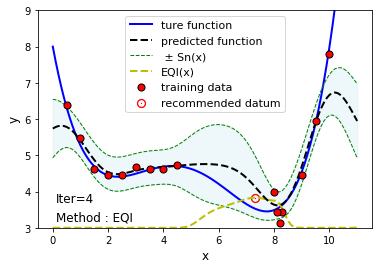

current optimal is : 3.5480057886752543
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.8]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.8731355916535017
2 -th sampling, result =  3.3484204819752854
3 -th sampling, result =  3.585243782245452
4 -th sampling, result =  4.646094207142992
5 -th sampling, result =  2.7184218902695765
evaluated mean of added datum: [3.63426319]
evaluated std of added datum: 0.6330460131591944
---------------------------------------

6-th iteration 
 new added datum: (7.800000000000001, array([3.63426319]))


<Figure size 432x288 with 0 Axes>

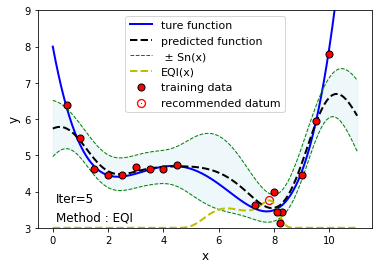

last response =  3.619881717422224
added datum y =  [3.63426319] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [18]:
guessed_noise_std = 0.7


data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(tao_new =guessed_noise_std)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

# optimal noise level of likelihood

In [19]:
def likelihood_opt_noise(xtrain,ytrain):
    noise_kernel = RBF() + WhiteKernel()
    noise_mdoel = GaussianProcessRegressor(kernel=noise_kernel,normalize_y=True).fit(xtrain,ytrain)
    optimal_noise = np.exp(noise_mdoel.kernel_.theta[1])
    return optimal_noise

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.411381324148866
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.5]
--------------Draw samples-------------
real std of added datum: 0.06713390624432053
1 -th sampling, result =  3.7791990038898464
2 -th sampling, result =  3.7359972997207462
3 -th sampling, result =  3.8809304133162392
4 -th sampling, result =  3.784365899348029
5 -th sampling, result =  3.8230184898026454
evaluated mean of added datum: [3.80070222]
evaluated std of added datum: 0.04868381514335307
---------------------------------------

1-th iteration 
 new added datum: (8.5, array([3.

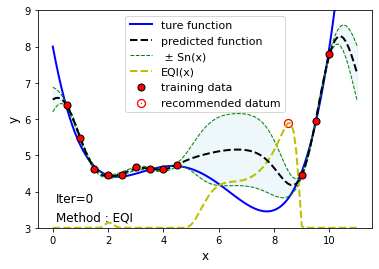

current optimal is : 3.809930085415062
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.3]
--------------Draw samples-------------
real std of added datum: 0.06626028900055539
1 -th sampling, result =  3.612124085194389
2 -th sampling, result =  3.458296760057644
3 -th sampling, result =  3.625749759664775
4 -th sampling, result =  3.5198433304263865
5 -th sampling, result =  3.536554993246169
evaluated mean of added datum: [3.55051379]
evaluated std of added datum: 0.06179932898341109
---------------------------------------

2-th iteration 
 new added datum: (7.300000000000001, array([3.55051379]))


<Figure size 432x288 with 0 Axes>

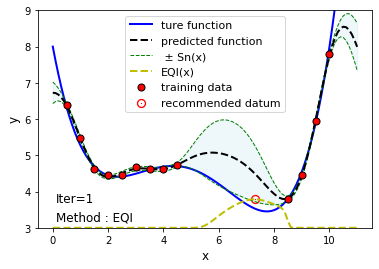

current optimal is : 3.555834842910482
The next datum recomended by Expected Quantile Improvement : 
 x =  [6.6]
--------------Draw samples-------------
real std of added datum: 0.05909914965603906
1 -th sampling, result =  3.965438463670822
2 -th sampling, result =  3.78402799803414
3 -th sampling, result =  3.8265240794255635
4 -th sampling, result =  3.876027580813614
5 -th sampling, result =  3.9951114128917347
evaluated mean of added datum: [3.88942591]
evaluated std of added datum: 0.08023990179256639
---------------------------------------

3-th iteration 
 new added datum: (6.6000000000000005, array([3.88942591]))


<Figure size 432x288 with 0 Axes>

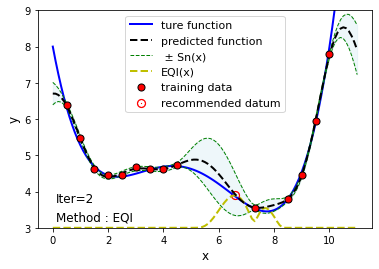

current optimal is : 3.5560708300215085
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.6]
--------------Draw samples-------------
real std of added datum: 0.0572965418395013
1 -th sampling, result =  3.5440042812470907
2 -th sampling, result =  3.45739617678641
3 -th sampling, result =  3.47065696911545
4 -th sampling, result =  3.4851890925900526
5 -th sampling, result =  3.519618897484221
evaluated mean of added datum: [3.49537308]
evaluated std of added datum: 0.0319677910238754
---------------------------------------

4-th iteration 
 new added datum: (7.6000000000000005, array([3.49537308]))


<Figure size 432x288 with 0 Axes>

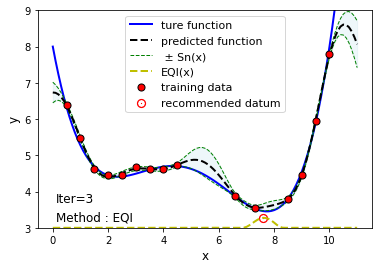

current optimal is : 3.515761449155493
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.6]
--------------Draw samples-------------
real std of added datum: 0.051573347813907496
1 -th sampling, result =  3.441669362444712
2 -th sampling, result =  3.4415803858895067
3 -th sampling, result =  3.4796547141535146
4 -th sampling, result =  3.437608290575081
5 -th sampling, result =  3.3865549958278773
evaluated mean of added datum: [3.43741355]
evaluated std of added datum: 0.02968643079357682
---------------------------------------

5-th iteration 
 new added datum: (7.6000000000000005, array([3.43741355]))


<Figure size 432x288 with 0 Axes>

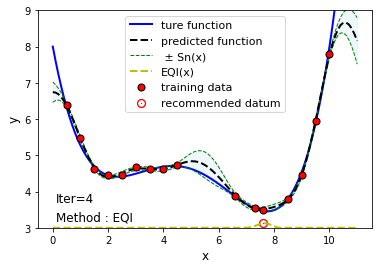

last response =  3.495373083444645
added datum y =  [3.43741355] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [21]:
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(tao_new =  np.sqrt(opt_noise))*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_likelihood_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 

# optimal noise level of loocv

In [22]:
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
def loocv_opt_noise(X,Y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    R2_list = []
    sigma2_list = []
    for i in range(100):
        sigma2 = i/200 # variance, sigma2
        ypre = []
        noise_kernel = RBF() 
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            model = GaussianProcessRegressor(kernel=noise_kernel,alpha=sigma2,normalize_y=True,random_state=0).fit(X_train,y_train)
            y_pre = model.predict(X_test)
            ypre.append(y_pre)       
        R2_list.append(r2_score(Y,ypre))
        sigma2_list.append(sigma2)
        index = R2_list.index(max(R2_list))
    return sigma2_list[index]

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528371527913455
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.4301162633521313
1 -th sampling, result =  3.1102617202834146
2 -th sampling, result =  3.664265268563389
3 -th sampling, result =  3.3108303235889025
4 -th sampling, result =  3.9475176249073547
5 -th sampling, result =  4.0297462349244935
evaluated mean of added datum: [3.61252423]
evaluated std of added datum: 0.3556005491921456
---------------------------------------

1-th iteration 
 new added datum: (8.4, array([3.6

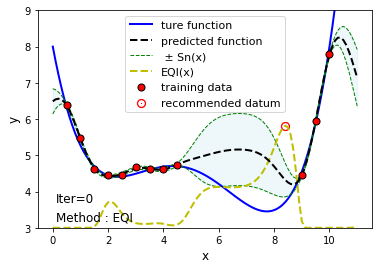

current optimal is : 3.6309596117234966
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.36923160985475
2 -th sampling, result =  3.5064092270431138
3 -th sampling, result =  3.5443231035561062
4 -th sampling, result =  3.5602876114728175
5 -th sampling, result =  3.6814453346396117
evaluated mean of added datum: [3.53233938]
evaluated std of added datum: 0.10043287957222029
---------------------------------------

2-th iteration 
 new added datum: (7.5, array([3.53233938]))


<Figure size 432x288 with 0 Axes>

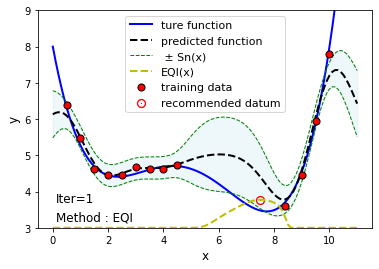

last response =  3.612524234453511
added datum y =  [3.53233938] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [23]:
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    # opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    opt_noise = loocv_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(tao_new =  np.sqrt(opt_noise))*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_loocv_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 